In [20]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gr3gory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gr3gory/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df = pd.read_csv('reviews.csv')
df['sentiment'] = np.where(df['Score'] > 3, 1, 0)
df = df[['Text','sentiment']]
df.head()

,Text,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [17]:
translator = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.translate(translator)
    cleaned = [i for i in word_tokenize(text.lower()) if i not in stop_words]
    return ' '.join(cleaned)

df['Text'] = df['Text'].map(clean_text)
df.head()

,Text,sentiment
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanutsth...,0
2,confection around centuries light pillowy citr...,1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price wide assortment yummy ...,1


In [18]:
train_X, test_X, train_y, test_y = train_test_split(df['Text'], df['sentiment'])

F1 score is 0.8910058186526622
Model trained in 10.298141956329346 seconds


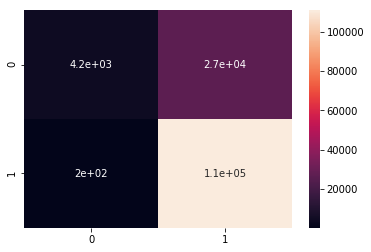

In [24]:
pipeline_mnb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
start = time.time()
pipeline_mnb.fit(train_X, train_y)
elapsed_time = time.time() - start
predictions_mnb = pipeline_mnb.predict(test_X)
sns.heatmap(confusion_matrix(test_y, predictions_mnb), annot=True)
print("F1 score is {}".format(f1_score(test_y, predictions_mnb)))
print("Model trained in {} seconds".format(elapsed_time))

# Do you believe that this model performs well?
An F1 score of 89.1 % would usually be good, but for a food review people may consider the high false positives to be bad. Overall there is a clear bias towards predicting a positive review. The false negatives are an order on magnitude smaller than the true negatives which is always good.

F1 score is 0.9379647801177515
Model trained in 10.422159433364868 seconds


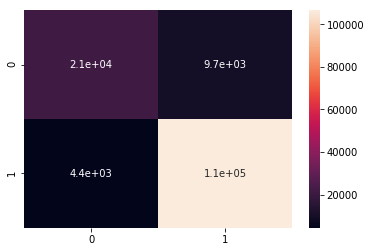

In [23]:
pipeline_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])
start2 = time.time()
pipeline_lr.fit(train_X, train_y)
elapsed_time2 = time.time() - start2
predictions_lr = pipeline_lr.predict(test_X)
sns.heatmap(confusion_matrix(test_y, predictions_lr), annot=True)
print("F1 score is {}".format(f1_score(test_y, predictions_lr)))
print("Model trained in {} seconds".format(elapsed_time))

# Which of the two models would you choose and why?
Overall I would go with the Logistic Regression model. The F1 score is much higher than the NB. Also the sum of the false positive and false negative are an order of magnitude smaller that the sum of the True postive and True negative. 
The Dataset also isnt so large to make make the thoretical O(log n) of Naive bayes relevant in this instance.